In [27]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor as xgb

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Dataset Overview

In [2]:
data = pd.read_csv("concrete.csv")

In [3]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
data.shape

(1030, 9)

In [5]:
for col in data.columns:
    rename_col = ' '.join(re.split(r'\(', col)[0].split())
    data.rename(columns={col: rename_col}, inplace=True)

In [6]:
data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [7]:
data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


### Data Preprocessing:

In [9]:
data2 = data.copy()

In [10]:
#check missing values

data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
strength              0
dtype: int64

#### Outliers

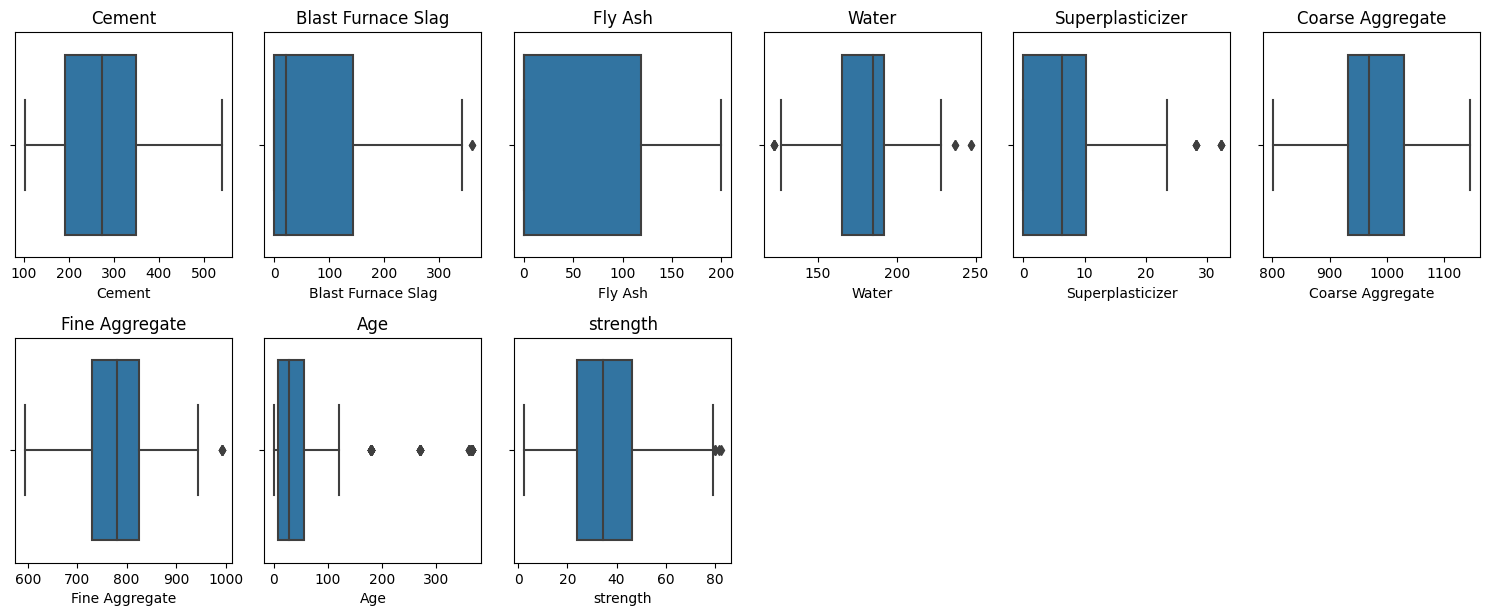

In [11]:
plt.figure(figsize=(15,15))

for ax, col in enumerate(data.columns):
    plt.subplot(5, 6, int(ax+1))
    plt.title(col)
    sns.boxplot(x=data[col], hue=data['strength'])

plt.tight_layout()
plt.show()

/home/applehx7/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_36832/3500196248.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=data[col],fill=True, hue=data['strength'])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/applehx7/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_36832/3500196248.py:6: UserWarning: Dataset has 0 variance; s

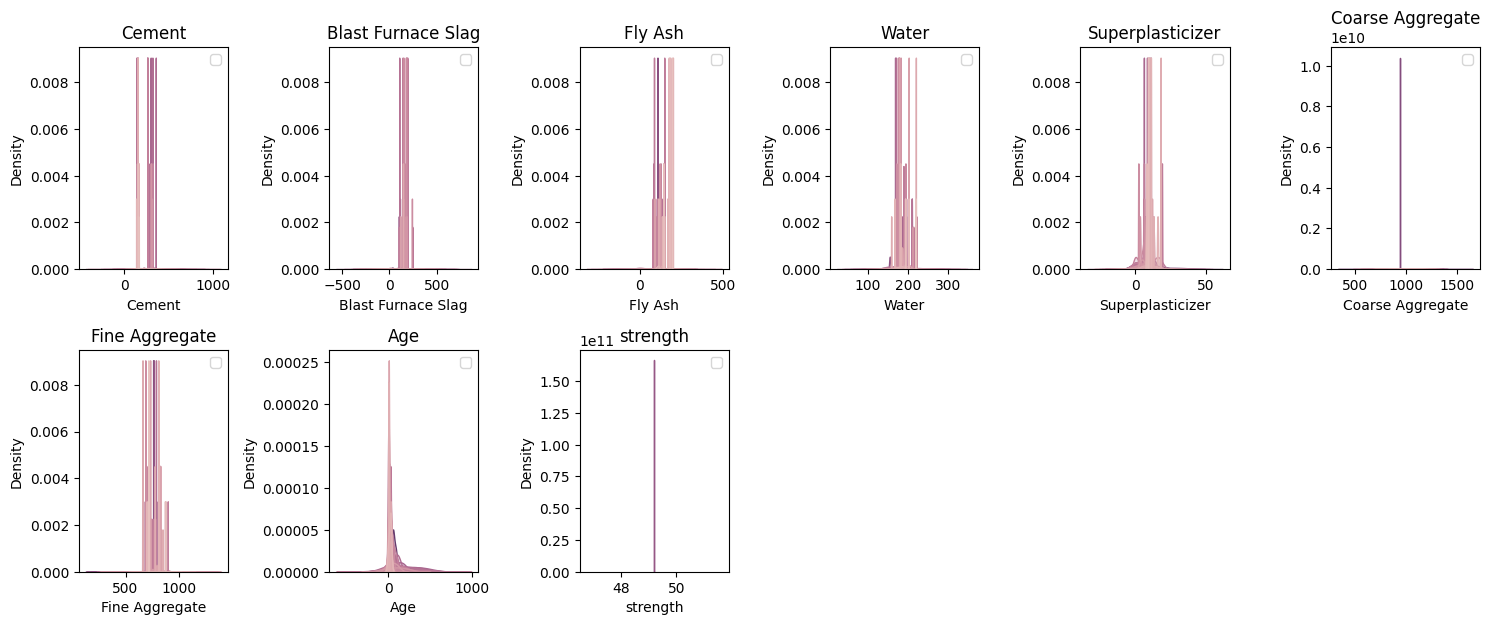

In [12]:
plt.figure(figsize=(15,15))

for ax, col in enumerate(data.columns):
    plt.subplot(5, 6, int(ax+1))
    plt.title(col)
    sns.kdeplot(x=data[col],fill=True, hue=data['strength'])
    plt.legend()
plt.tight_layout()
plt.show()

In [13]:
def remove_outlier(dataframe, column_name):
    Q1 = data[column_name].quantile(.25)
    Q3 = data[column_name].quantile(.75)
    IQR = Q3 - Q1
    lower_fence = Q1-(1.5*IQR)
    upper_fence = Q3 + (1.5*IQR)
    data.loc[(data[column_name] <= lower_fence), column_name] = data[column_name].median()
    data.loc[(data[column_name] >= upper_fence), column_name] = data[column_name].median()

def check_outliers(dataframe, column_name):
    Q1 = data[column_name].quantile(.25)
    Q3 = data[column_name].quantile(.75)
    IQR = Q3 - Q1
    lower_fence = Q1-(1.5*IQR)
    upper_fence = Q3 + (1.5*IQR)
    if data[(data[column_name] < lower_fence) | (data[column_name] > upper_fence)].any(axis=None):
        return True
    else:
        return False

In [14]:
for col in data.columns:
    print(f"{col} : {check_outliers(data, col)}")

Cement : False
Blast Furnace Slag : True
Fly Ash : False
Water : True
Superplasticizer : True
Coarse Aggregate : False
Fine Aggregate : True
Age : True
strength : True


In [15]:
for col in data.columns:
    while check_outliers(data, col):
        remove_outlier(data, col)

### EDA and Exploring the distribution of the target variable and features.

/home/applehx7/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


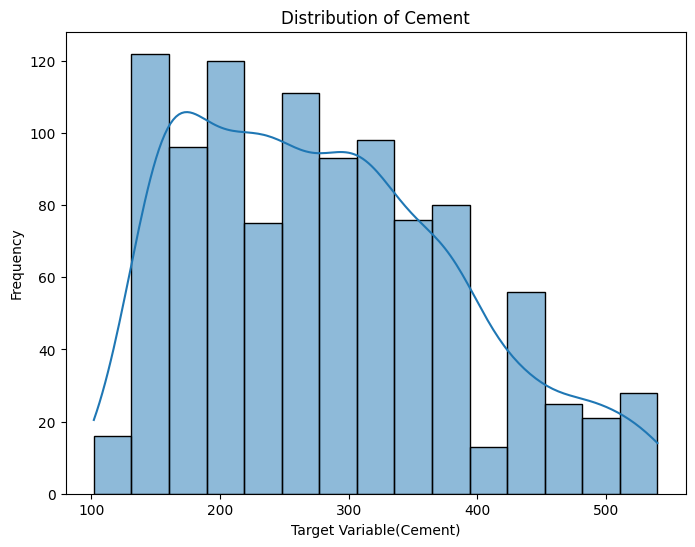

/home/applehx7/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


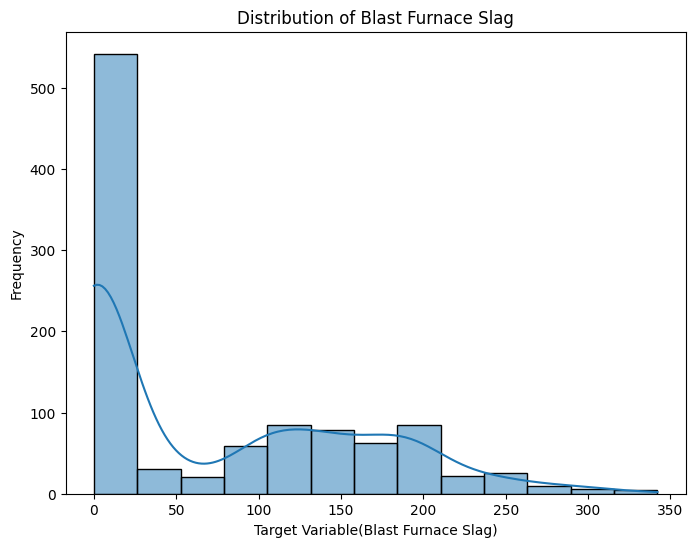

/home/applehx7/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


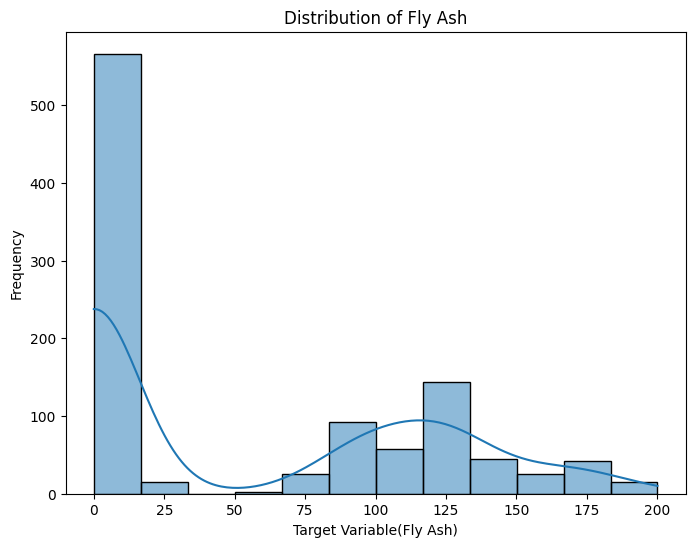

/home/applehx7/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


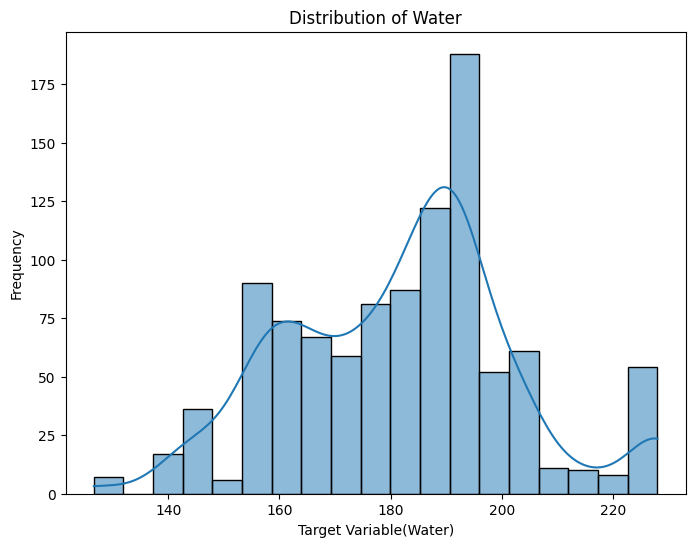

/home/applehx7/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


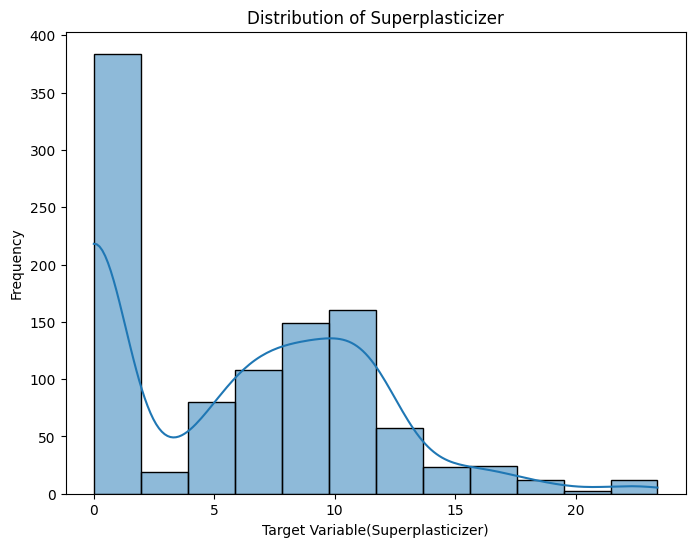

/home/applehx7/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


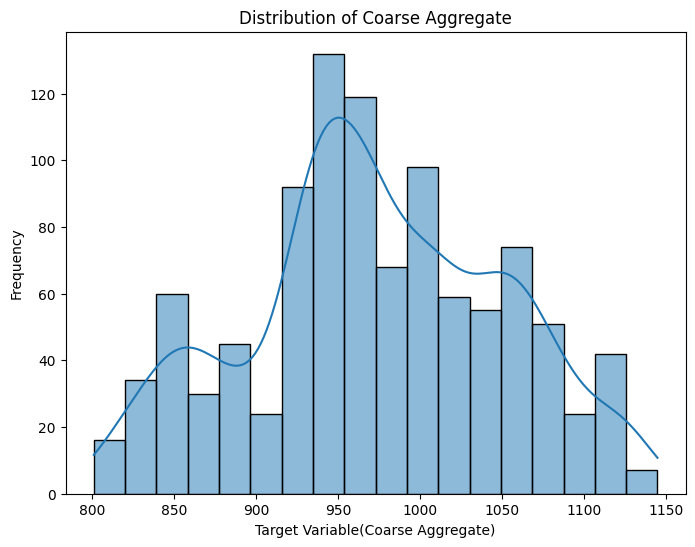

/home/applehx7/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


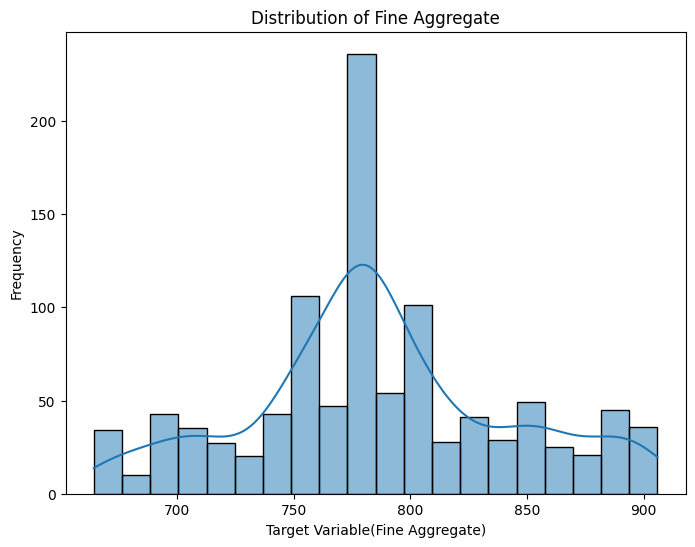

/home/applehx7/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


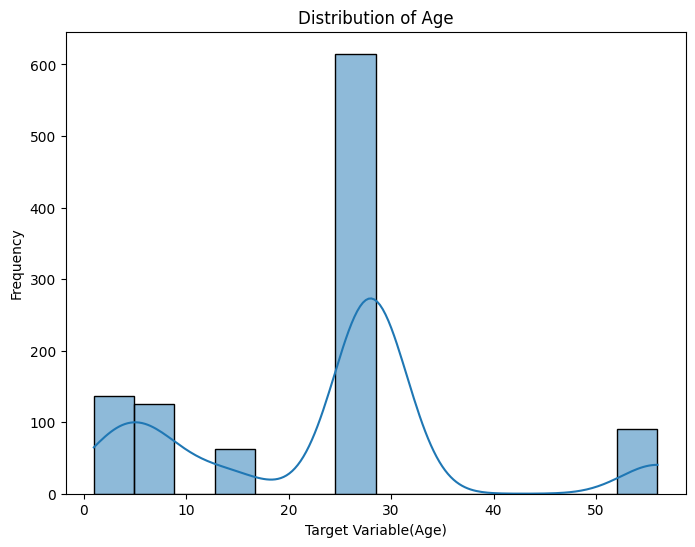

/home/applehx7/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


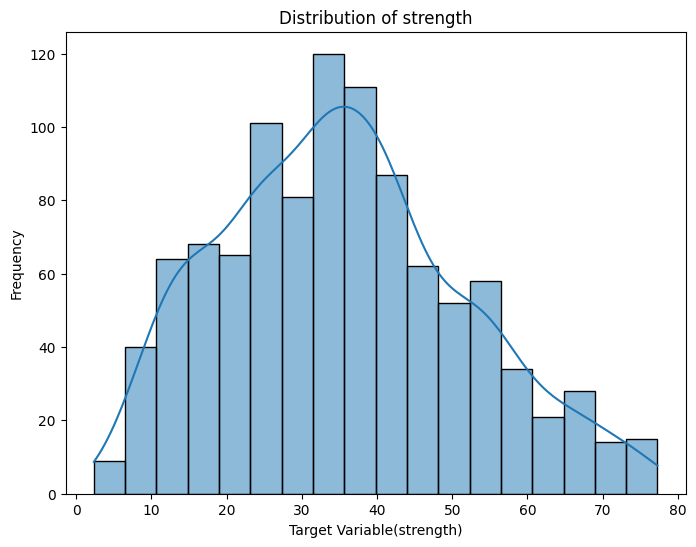

In [16]:
for col in data.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(f'Target Variable({col})')
    plt.ylabel('Frequency')
    plt.show()

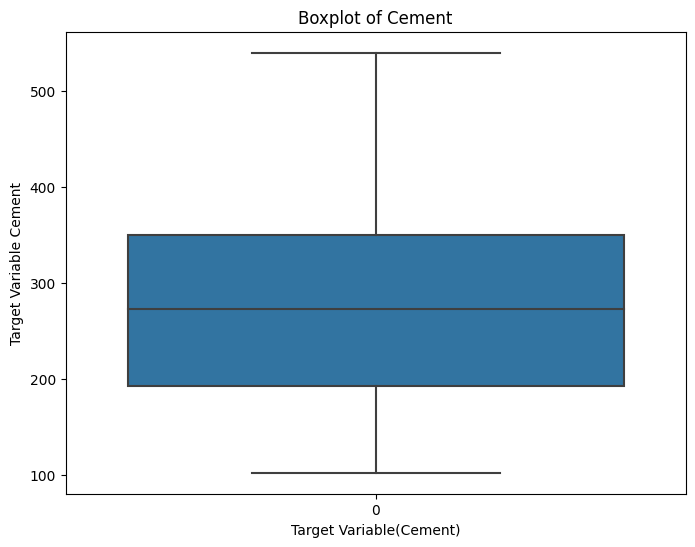

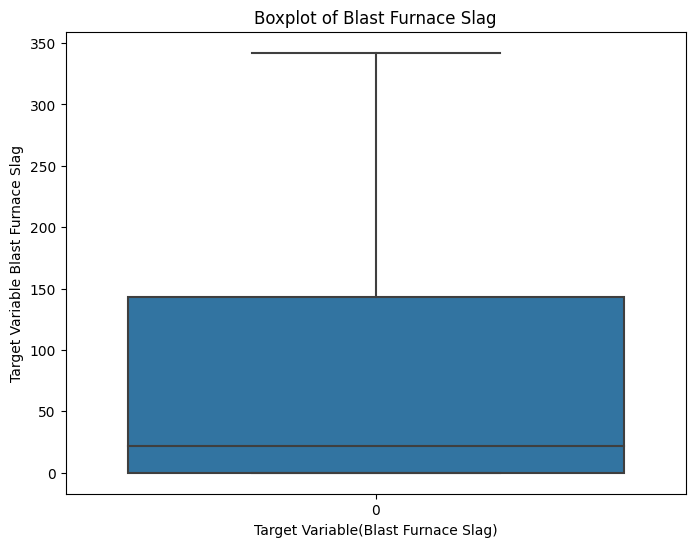

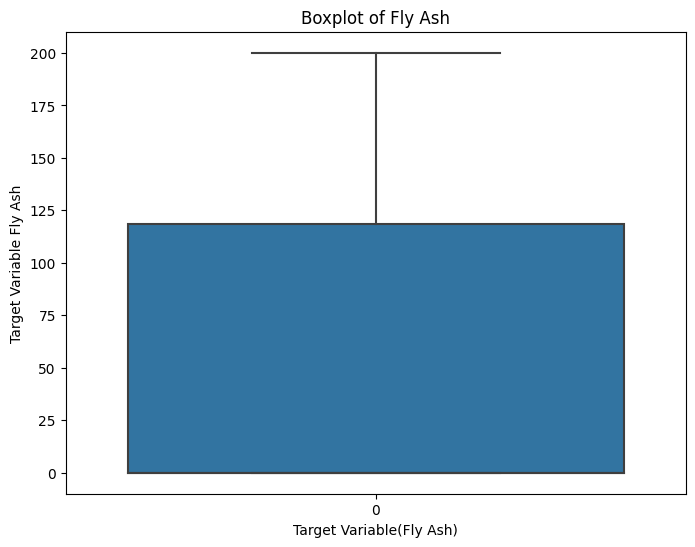

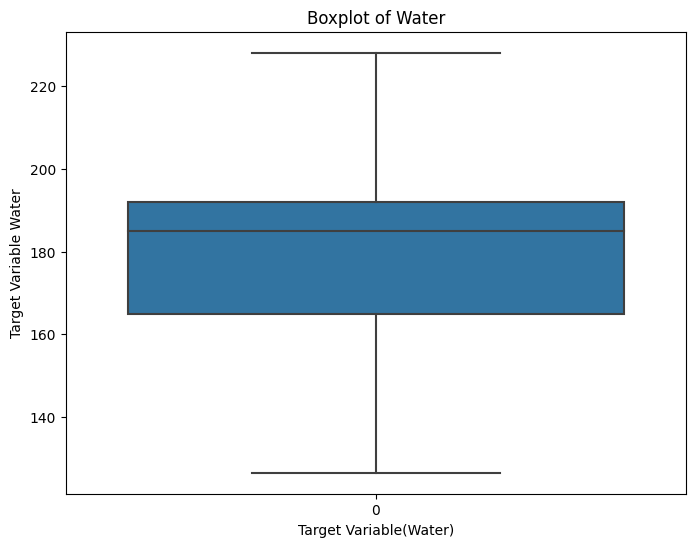

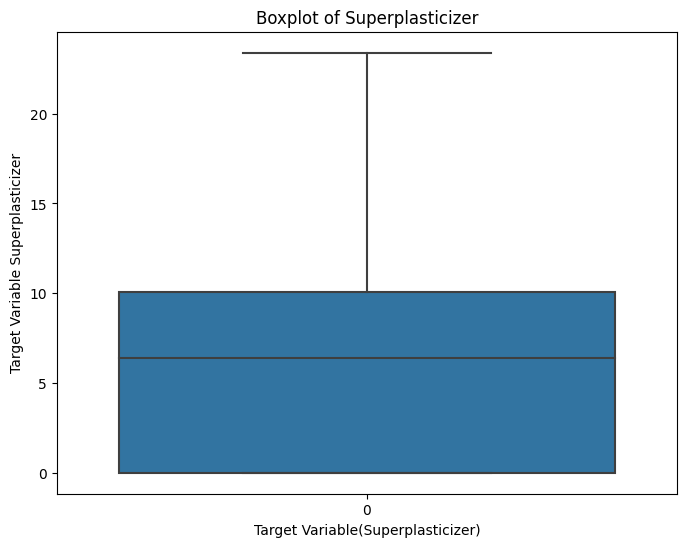

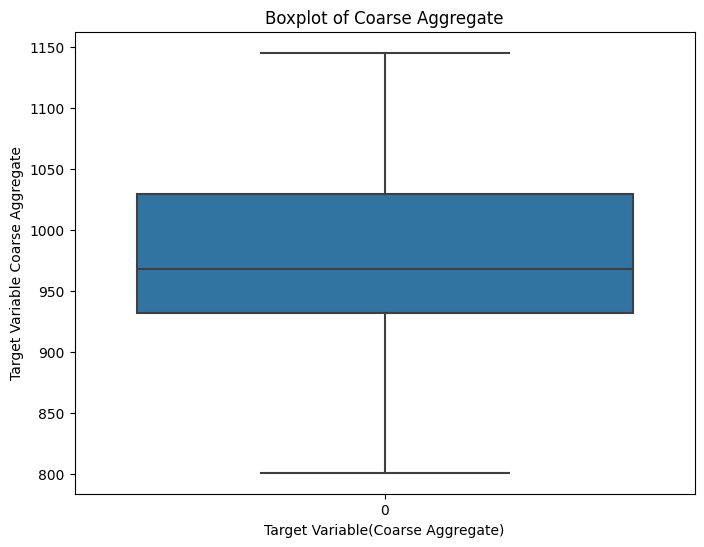

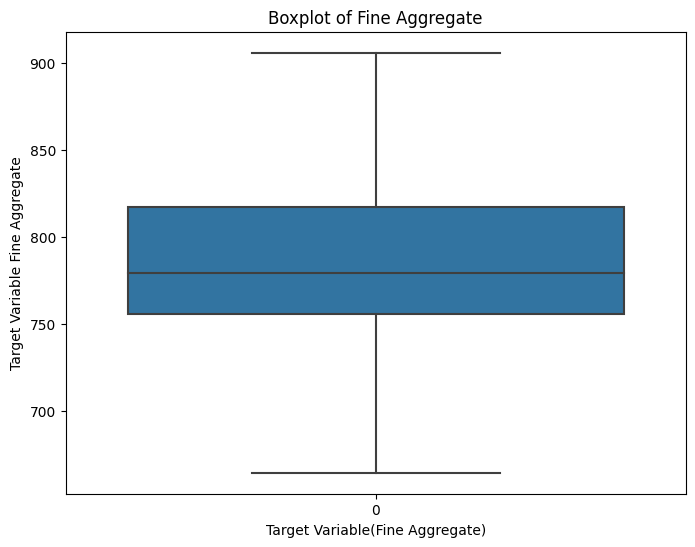

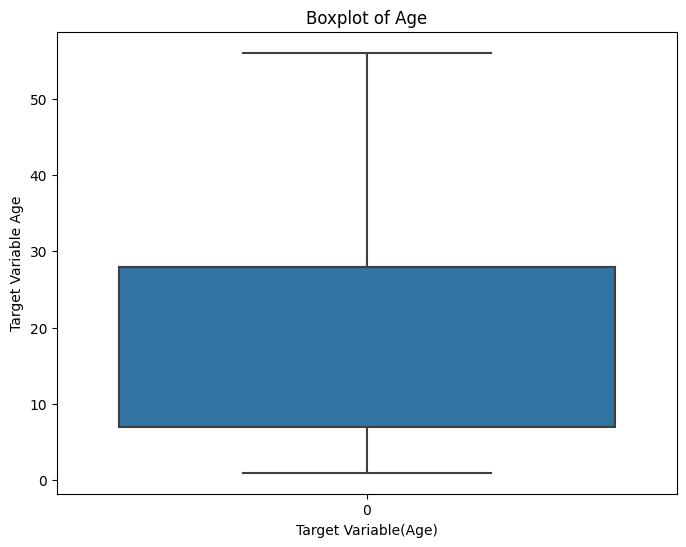

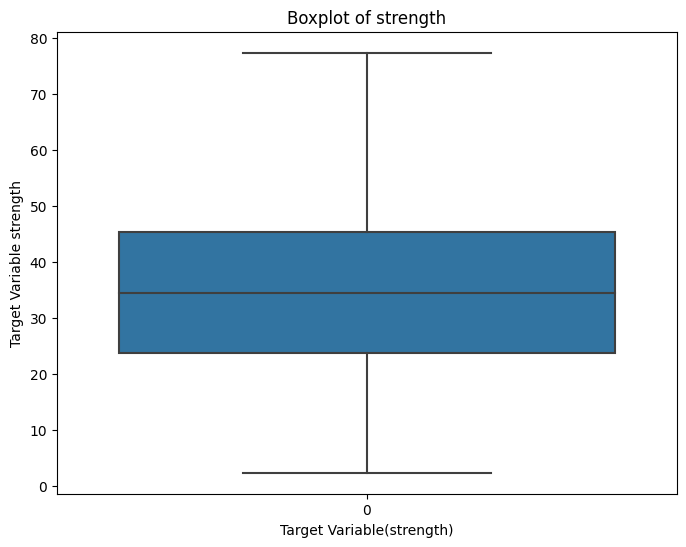

In [17]:
for col in data.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(f'Target Variable {col}')
    plt.xlabel(f'Target Variable({col})')
    plt.show()

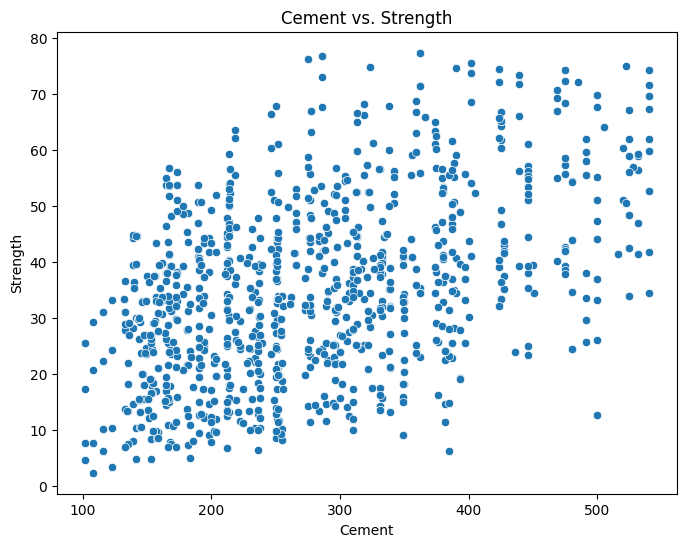

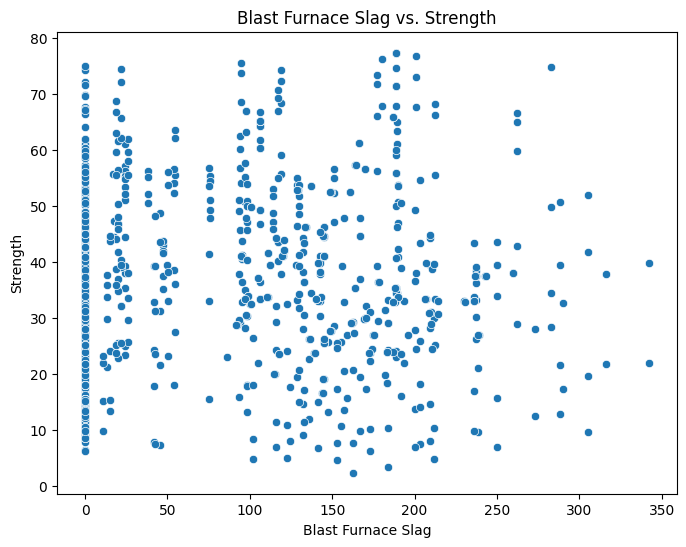

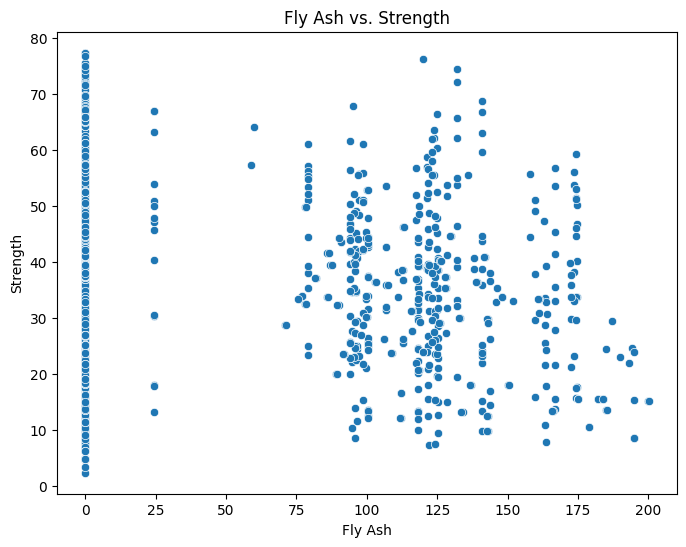

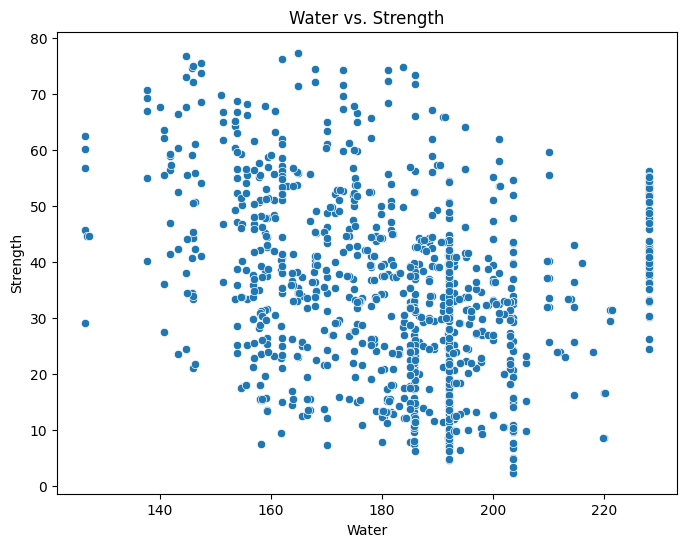

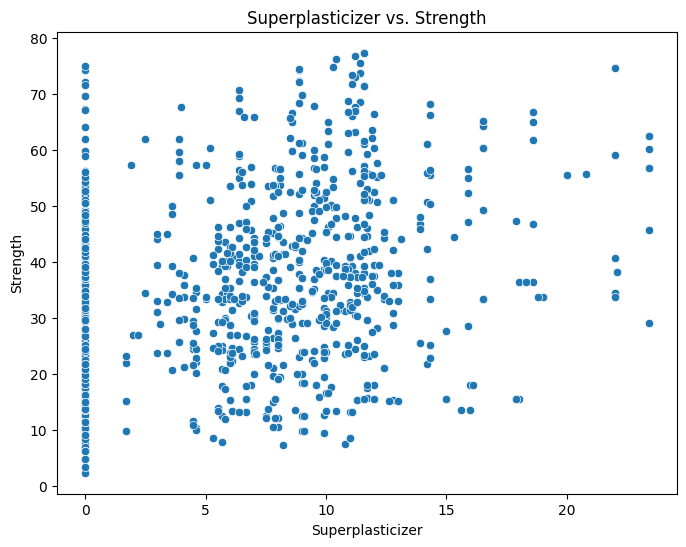

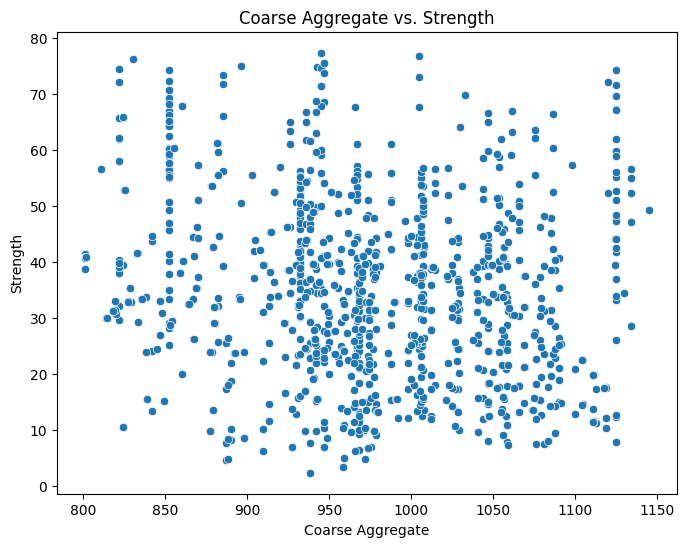

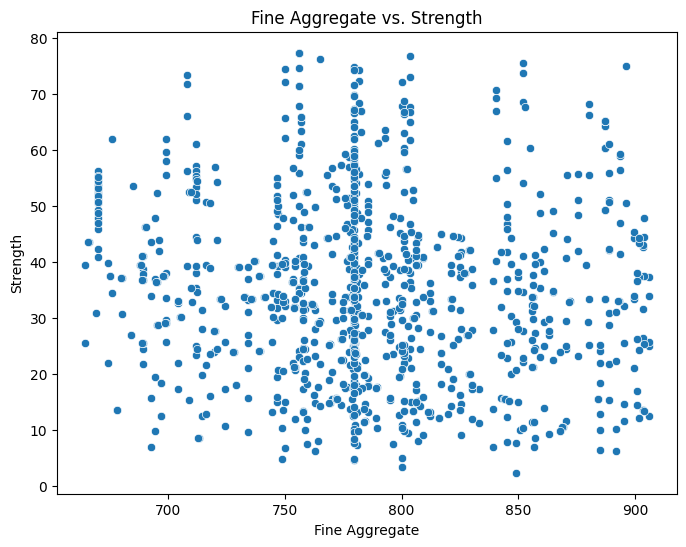

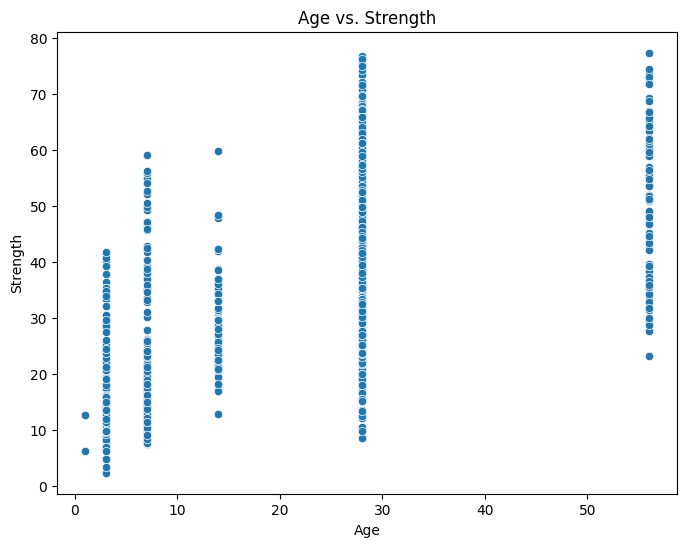

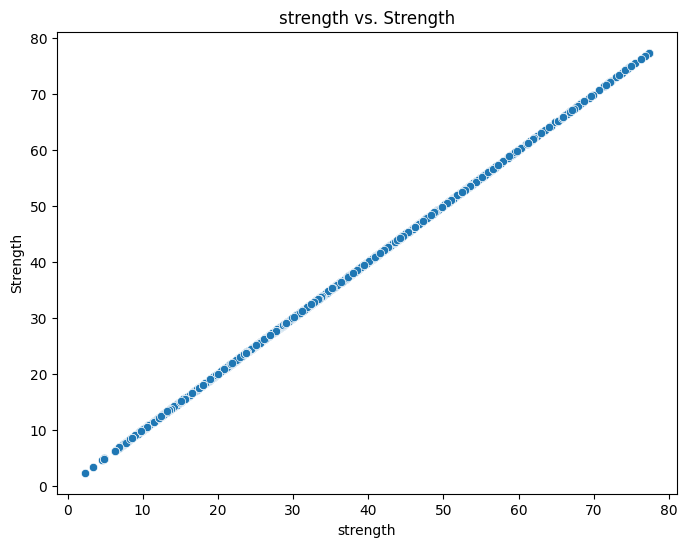

In [18]:
for col in data.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data[col], y=data['strength'])
    plt.title(f'{col} vs. Strength')
    plt.xlabel(col)
    plt.ylabel('Strength')
    plt.show()

/home/applehx7/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/applehx7/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/applehx7/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/applehx7/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

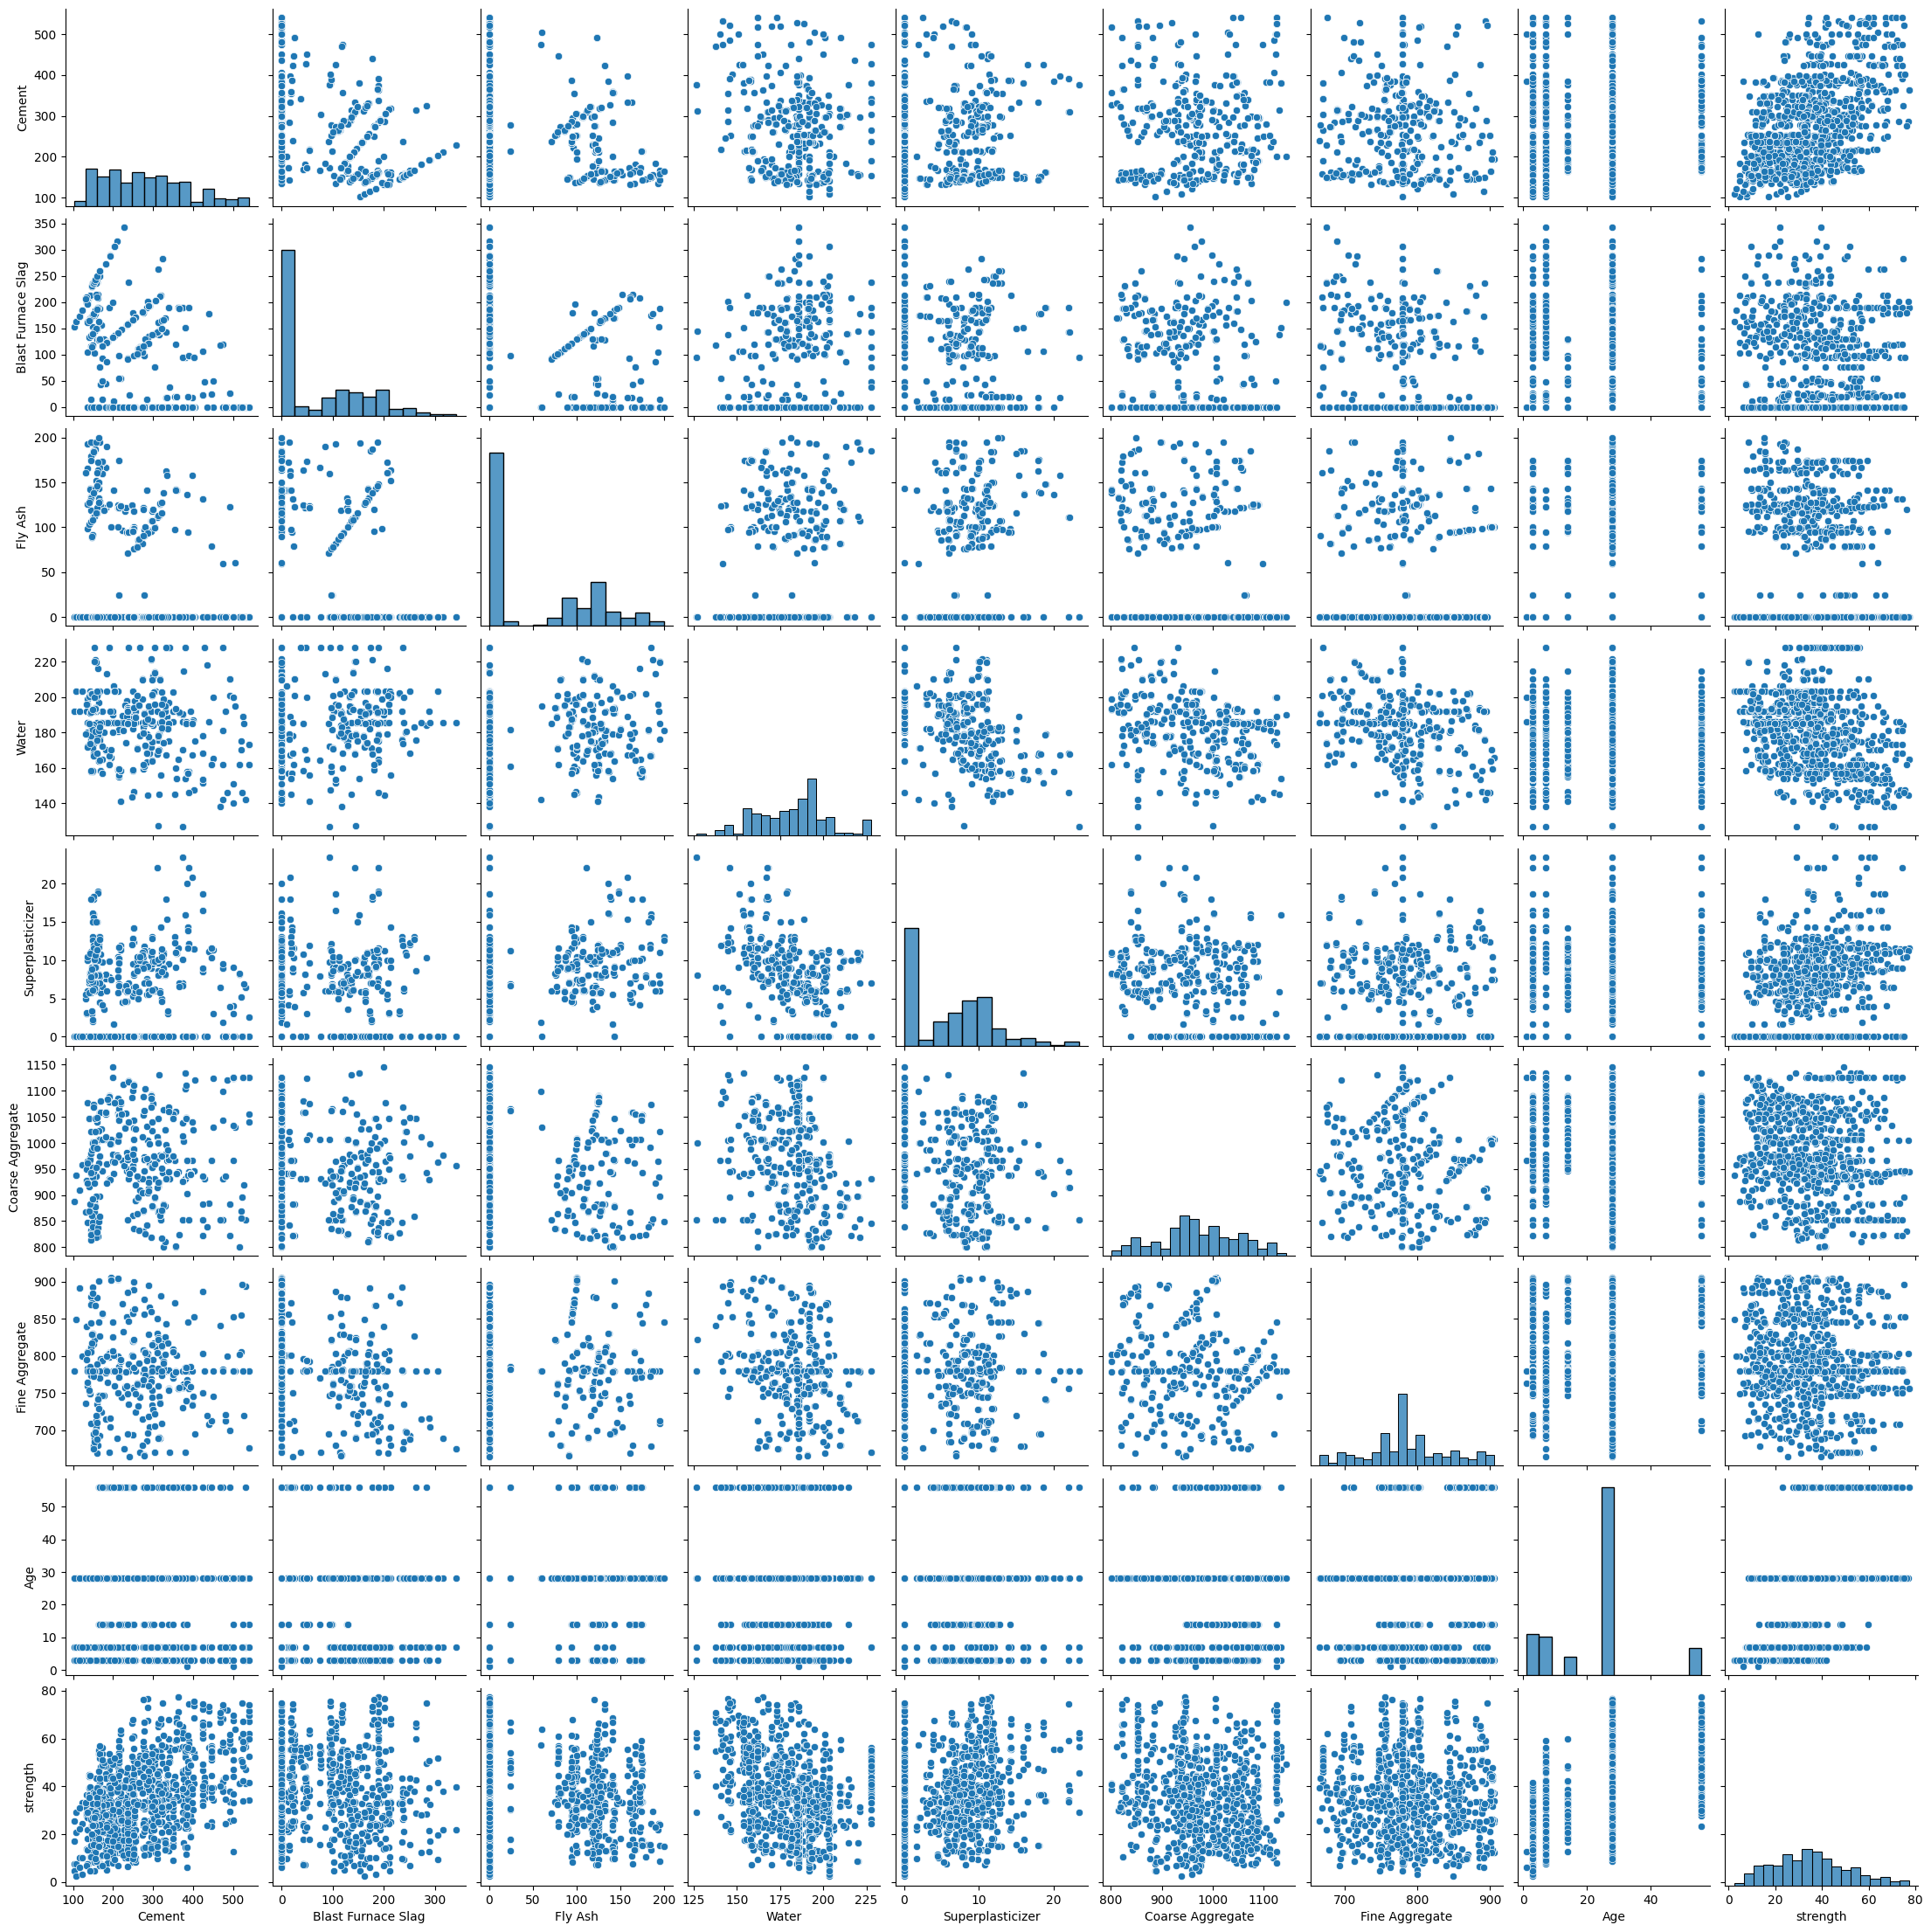

In [19]:
sns.pairplot(data)

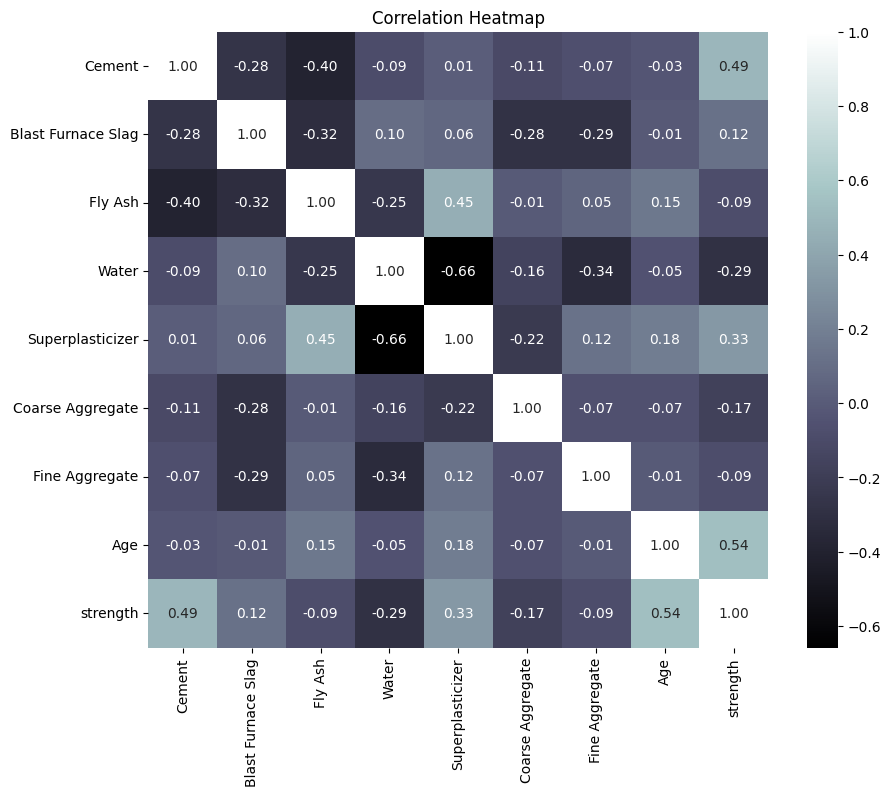

In [20]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='bone', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Scaling and Splitting

In [21]:
x = data.drop(['strength'], axis=1)
y = pd.DataFrame(data['strength'])

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=.3, random_state=42)

In [23]:
scaler = StandardScaler()

In [24]:
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

### Model Selection and Training

In [28]:
models = [
    LinearRegression(),
    RandomForestRegressor(),
    xgb()
]

In [29]:
def train_md(model, X, Y, testX):
    model.fit(X, Y)
    predicted = model.predict(testX)
    model_name = type(model).__name__
    return model_name, predicted

In [30]:
model_inf = {}

In [31]:
for model in models:
    name, pred = train_md(model, X_train, Y_train, X_test)
    model_inf[name] = {'actual_Y': Y_test, 'predicted_Y': pred}

/tmp/ipykernel_36832/2794685275.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X, Y)


### Evaluation

In [32]:
def get_score(x, y):
    sc = {
            'MSE' : mean_squared_error(x, y),
            'MAE' : mean_absolute_error(x, y),
            'R2' : r2_score(x, y),
            'RMSE' : np.sqrt(mean_squared_error(x, y))
    }
    return sc

In [33]:
score = {}

for model_name in model_inf:
    sc = get_score(model_inf[model_name]['actual_Y'], model_inf[model_name]['predicted_Y'])
    score[model_name] = sc

In [34]:
for name in score:
    print("-----------********-----------")
    print(name)
    for i in score[name]:
        print(i, ":", score[name][i])

-----------********-----------
LinearRegression
MSE : 76.56408075141017
MAE : 6.790782891617033
R2 : 0.7094232945986152
RMSE : 8.75009032818577
-----------********-----------
RandomForestRegressor
MSE : 47.53329023278639
MAE : 4.947496895975295
R2 : 0.8196012185194753
RMSE : 6.8944390803593585
-----------********-----------
XGBRegressor
MSE : 47.21011467270518
MAE : 4.7518051358565545
R2 : 0.8208277373856725
RMSE : 6.8709616992605325


### Feature Importance

/tmp/ipykernel_36832/1490296704.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


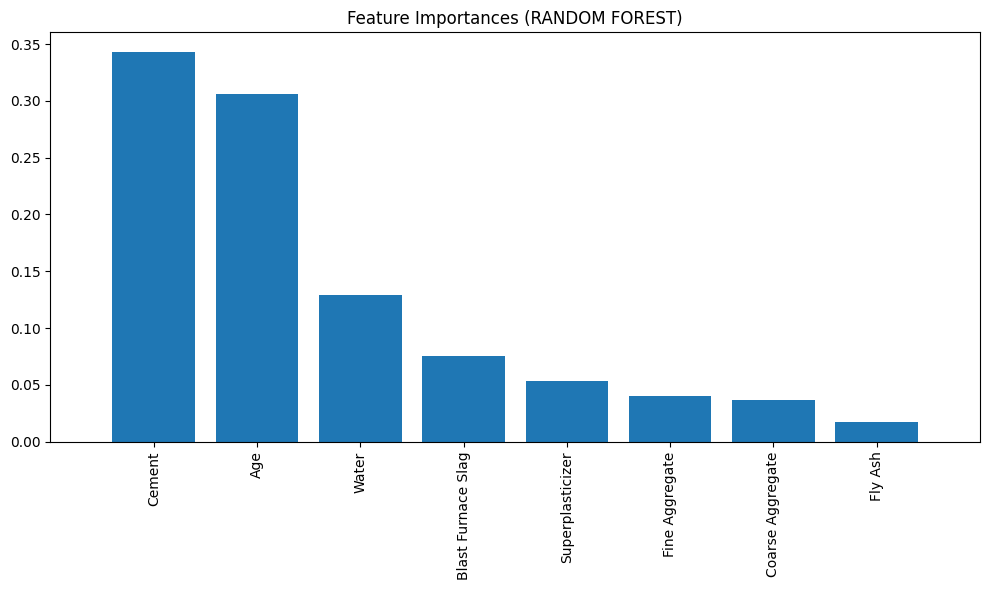

In [35]:
rf = RandomForestRegressor()
rf.fit(X_train, Y_train)
feature_importances_rf = rf.feature_importances_

indices_rf = np.argsort(feature_importances_rf)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances (RANDOM FOREST)")
plt.bar(range(X_train.shape[1]), feature_importances_rf[indices_rf], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices_rf], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

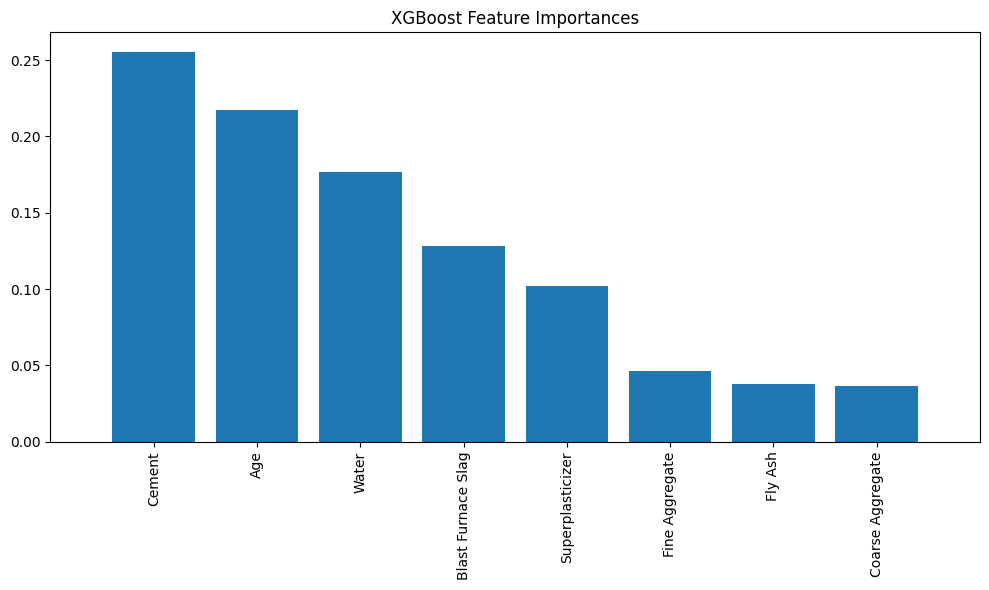

In [37]:
xgboost = xgb()
xgboost.fit(X_train, Y_train)
feature_importances_xgb = xgboost.feature_importances_
indices_xgb = np.argsort(feature_importances_xgb)[::-1]

plt.figure(figsize=(10, 6))
plt.title("XGBoost Feature Importances")
plt.bar(range(X_train.shape[1]), feature_importances_xgb[indices_xgb], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices_xgb], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

### HyperParameter Tuning

In [39]:
models = {
    LinearRegression(): {
        'params': {
            'fit_intercept': [True, False],
            'copy_X': [True, False],
            'n_jobs': [1, 2, 3],
            'positive': [True, False]
        }
    },
    RandomForestRegressor(): {
        'params': {
            'n_estimators': [20, 50, 100, 200],
            'criterion': ['squared_error', 'absolute_error'],
            'min_samples_leaf': [1, 2],
            'max_features': ['sqrt', 'log2']
        }
    },
    xgb(): {
        'params': {
            'learning_rate': [0.1, 0.01, 0.001, 2],
            'n_estimators': [20, 50, 100, 200],
            'criterion': ['friedman_mse', 'squared_error'],
            'min_samples_leaf': [1, 2]
        }
    },
}

In [40]:
model_info = {}

In [41]:
for model in models:
    clf = RandomizedSearchCV(model, param_distributions=models[model]['params'], random_state=0, n_iter=50)
    clf.fit(X_train, Y_train)
    model_info[type(model).__name__] = {'Best Score': clf.best_score_, 'BestFittedModel': clf.best_estimator_}

/home/applehx7/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 24 is smaller than n_iter=50. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/home/applehx7/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 32 is smaller than n_iter=50. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/home/applehx7/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/applehx7/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

In [42]:
model_info

{'LinearRegression': {'Best Score': 0.6643038573087645,
  'BestFittedModel': LinearRegression(n_jobs=1)},
 'RandomForestRegressor': {'Best Score': 0.8040859020615324,
  'BestFittedModel': RandomForestRegressor(max_features='log2')},
 'XGBRegressor': {'Best Score': 0.808336466556104,
  'BestFittedModel': XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, criterion='squared_error', device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=0.1, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
               max_leaves=None, min_child_weight=None, min_samples_leaf=1,
               missing=nan, monotone_constraints=None

### Evaluation Metrics:

In [43]:
for model_name in model_info:
    actual_y = Y_test
    pred_y = model_info[model_name]['BestFittedModel'].predict(X_test)

    mse = mean_squared_error(actual_y, pred_y)
    mae = mean_absolute_error(actual_y, pred_y)
    r2score = r2_score(actual_y, pred_y)
    rmse = np.sqrt(mse)

    print(f"----------*** {model_name} ***----------")
    print("Mean Squared Error: ", mse)
    print("Mean Absolute Error: ", mae)
    print("R2 Score: ", r2score)
    print("Root Mean Squared Error", rmse)
    print("")

----------*** LinearRegression ***----------
Mean Squared Error:  76.56408075141017
Mean Absolute Error:  6.790782891617033
R2 Score:  0.7094232945986152
Root Mean Squared Error 8.75009032818577

----------*** RandomForestRegressor ***----------
Mean Squared Error:  42.750727139238265
Mean Absolute Error:  4.768612781553893
R2 Score:  0.8377520460806339
Root Mean Squared Error 6.538404020801885

----------*** XGBRegressor ***----------
Mean Squared Error:  45.15558617635081
Mean Absolute Error:  4.742664722887058
R2 Score:  0.8286251028834999
Root Mean Squared Error 6.7197906348598995



## Comparative Analysis:
1. Performance Evaluation Metrics:

    - Use evaluation metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2) score.
    - Compute these metrics for each model using the same testing dataset.
    - Analyze which model performs better based on these metrics. For instance, lower values of MAE, MSE, and RMSE indicate better predictive performance, while higher R2 scores signify a better fit of the model.
2. Strengths of Models:

    - Discuss the strengths of each model in the context of concrete strength prediction:
    - Linear Regression: Simplicity, easy interpretability, works well with linear relationships in data.
    - Random Forest Regressor: Handles nonlinear relationships, robust to outliers, less prone to overfitting.
    - Gradient Boosting Regressor (XGBoost): Better predictive accuracy, handles complex relationships, feature importance insights.
3. Limitations of Models:

    - Highlight the limitations of each model:
    - Linear Regression: Assumption of linear relationships might not hold in real-world scenarios, sensitive to outliers.
    - Random Forest Regressor: Complexity, may overfit with a large number of trees, less interpretable compared to simpler models.
    - Gradient Boosting Regressor (XGBoost): Computationally expensive, tuning parameters might be tricky, potential overfitting with improper hyperparameters.
4. Model Interpretability:

    - Discuss how easy or difficult it is to interpret and explain the predictions of each model. Linear Regression offers straightforward interpretation, while tree-based models like Random Forest and Gradient Boosting might provide insights into feature importance but are more complex to interpret.
5. Scalability and Efficiency:

    - Consider the scalability and efficiency of models when working with larger datasets. Linear Regression is usually more scalable, whereas ensemble models like Random Forest and Gradient Boosting might require more computational resources.
6. Handling of Nonlinear Relationships:

    - Highlight the capability of models to capture nonlinear relationships in concrete strength prediction. Tree-based models like Random Forest and Gradient Boosting inherently handle nonlinear relationships better than Linear Regression.
7. Robustness to Data Variation:

    - Discuss how each model performs in the presence of noisy or incomplete data. Robust models like Random Forest and Gradient Boosting might handle such variations better than Linear Regression.